In [1]:
import warnings
warnings.filterwarnings('ignore')

#General Data/Plotting
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm 
import random

# Language
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from nltk.tokenize import word_tokenize

import re 
from collections import Counter
from string import punctuation

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential 
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [2]:
# read dataset and save it into df variable
df = pd.read_csv('../Datasets/Books_rating.csv')

In [3]:
# rename columns for better understanding
df = df.rename(columns={"review/text":"Review","review/score": "Rating","review/summary":"Title", "review/helpfulness":"helpful"})

# drop unessesary data
df.drop(['Id', 'Price', 'User_id', 'profileName', 'review/time'], axis='columns', inplace=True)

# split the helpful tuple into two new rows
df['helpful_0'] = df['helpful'].apply(func=lambda x: int(x.split('/')[0]))
df['helpful_1'] = df['helpful'].apply(func=lambda x: int(x.split('/')[1]))

# number of reviews
print("Number of Datapoints: ", len(df))

Number of Datapoints:  3000000


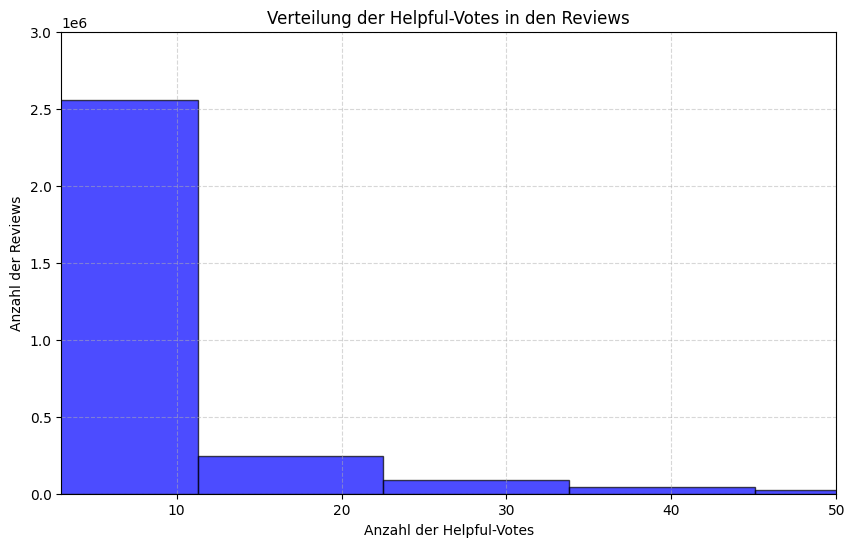

In [4]:
# Verteilung der Bewertungen unter den Reviews
# Plot erstellen
plt.figure(figsize=(10, 6))
plt.hist(df['helpful_1'], bins=1000, color='blue', edgecolor='black', alpha=0.7, density=False)

# Titel und Beschriftungen hinzufügen
plt.title('Verteilung der Helpful-Votes in den Reviews')
plt.xlabel('Anzahl der Helpful-Votes')
plt.ylabel('Anzahl der Reviews')

# Gitter hinzufügen
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 3000000)  # Hier kannst du den Bereich anpassen
plt.xlim(3, 50)

# Diagramm anzeigen
plt.show()

In [5]:
# Remove Reviews that have less than 20 helpful votes
df = df[df['helpful_1'] >= 20]

# add calculation of helpfullness ration and convert it to an int percentage
df['helpful_ratio'] = df['helpful_0'] / df['helpful_1']
df['ratio_percent'] = (df['helpful_ratio'] * 100).astype(int)

# remove helpfullness ratio
df.drop(['helpful_ratio'], axis='columns', inplace=True)

# calculate length of reviews in new column
df['review_len'] = [len(text.split()) for text in df.Review]

# classify reviews with a ratio_percent over 70% as helpful
def convert_label(df) : 
    if df['ratio_percent'] <= 70 : 
        rate = 0 # for Negative 
    else : 
        rate = 1 # for Positive
        
    return rate

df['IsHelpful'] = df.apply(convert_label, axis = 1)


# number of reviews
print("Number of Datapoints after preprocessing: ", len(df))

Number of Datapoints after preprocessing:  239553


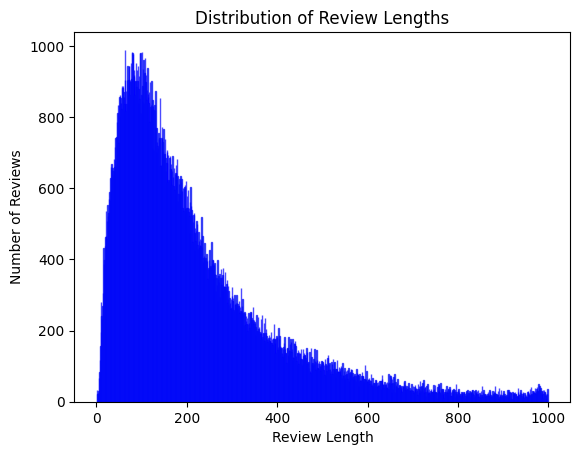

In [7]:
# Assuming 'review_len' is the column containing the lengths of reviews
review_lengths = df['review_len']

# Create a histogram
plt.hist(review_lengths, bins=range(1, 1000), edgecolor='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')

# Show the plot
plt.show()

In [8]:
# remove reviews below 300 words
df = df[df['review_len'] <= 300]
len(df)

181104

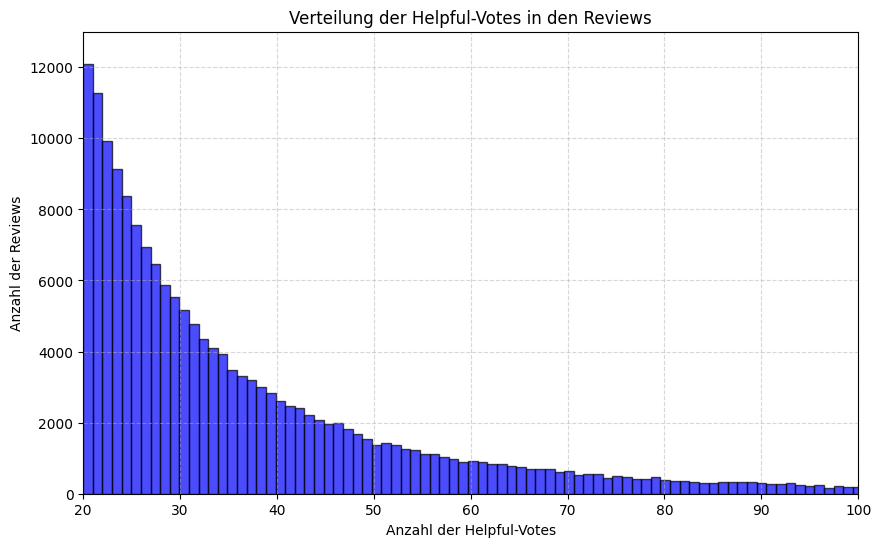

In [9]:
# Verteilung der Bewertungen unter den Reviews
# Plot erstellen
plt.figure(figsize=(10, 6))
plt.hist(df['helpful_1'], bins=3400, color='blue', edgecolor='black', alpha=0.7, density=False)

# Titel und Beschriftungen hinzufügen
plt.title('Verteilung der Helpful-Votes in den Reviews')
plt.xlabel('Anzahl der Helpful-Votes')
plt.ylabel('Anzahl der Reviews')

# Gitter hinzufügen
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 13000)  # Hier kannst du den Bereich anpassen
plt.xlim(20, 100)

# Diagramm anzeigen
plt.show()


In [10]:
# export to new csv
#df.to_csv('../Datasets/Modified_Books_rating.csv', index=False)